In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import imutils
import cv2

from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import shutil

In [2]:
filename = "cr_img.jpg"

if os.path.exists('output'):
    shutil.rmtree('output')

os.makedirs('output')

In [3]:
cap = cv2.VideoCapture(filename)
# cap = cv2.VideoCapture(0)
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    if ret == True:
        #cv2.imshow('window-name',frame)
        cv2.imwrite("C:/Users/shubh/OneDrive/Desktop/dumpy/output/frame%d.jpg" % count, frame)
        count = count + 1
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

(478, 1044)


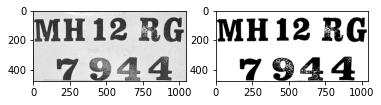

478


In [4]:
# car image -> grayscale image -> binary image
car_image = imread("C:/Users/shubh/OneDrive/Desktop/dumpy/output/frame%d.jpg"%(count-1), as_gray=True)
#car_image = imutils.rotate(car_image, 270)
# car_image = imread("car.png", as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
# print(binary_car_image)
ax2.imshow(binary_car_image, cmap="gray")
# ax2.imshow(gray_car_image, cmap="gray")
plt.show()

# CCA (finding connected regions) of binary image


# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)

print(label_image.shape[0]) #width of car img

(14.34, 38.24, 156.6, 313.2)
(38.24, 95.60000000000001, 156.6, 417.6)
hi
hello
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


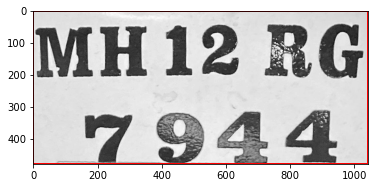

In [5]:
# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.03*label_image.shape[0], 0.08*label_image.shape[0], 0.15*label_image.shape[1], 0.3*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
# print(min_height,end = " ")
# print(max_height,end = " ")
# print(min_width)
print(plate_dimensions)
print(plate_dimensions2)
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag =0
# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
#     print(region.area)
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
#         print("inside if")
        continue
    #print("in continue")
        # the bounding box coordinates
    min_row, min_col, max_row, max_col = region.bbox
    # print(min_row)
    # print(min_col)
    # print(max_row)
    # print(max_col)

    region_height = max_row - min_row
    region_width = max_col - min_col
#     print(region_height,end = " ")
#     print(region_width)

    # ensuring that the region identified satisfies the condition of a typical license plate
   # if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width>= max_width and region_width > region_height:
    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height >= max_height and region_width >= min_width and region_width >= max_width and region_width > region_height:
        flag = 1
        print("hi")
#     if region_height >= min_height and region_height >= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
#         flag = 1
        plate_like_objects.append(binary_car_image[min_row:max_row,min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",linewidth=2, fill=False)
        #rectBorder = patches.Rectangle((350, 750), 550, 280, edgecolor="red",linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        # let's draw a red rectangle over those regions
if(flag == 1):
    print("hello")
    print(plate_like_objects[0])
    plt.show()
    
if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    print(plate_dimensions2)
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 50:
            #if the region is so small then it's likely not a license plate
            continue
            # the bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row)
        # print(min_col)
        # print(max_row)
        # print(max_col)

        region_height = max_row - min_row
        region_width = max_col - min_col
        # print(region_height)
        # print(region_width)

        # ensuring that the region identified satisfies the condition of a typical license plate
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            print("hello")
            plate_like_objects.append(binary_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            # let's draw a red rectangle over those regions
   # print(plate_like_objects[0])
    plt.show()

In [6]:
#SEGMENTED

In [7]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

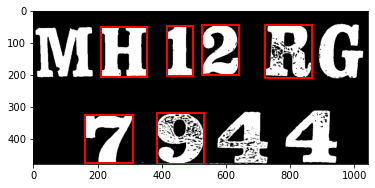

In [21]:
# The invert was done so as to convert the black pixel to white pixel and vice versa
license_plate = np.invert(plate_like_objects[0])

labelled_plate = measure.label(license_plate)

fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")
# the next two lines is based on the assumptions that the width of
# a license plate should be between 5% and 15% of the license plate,
# and height should be between 35% and 60%
# this will eliminate some
character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0
    if region_height < min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
        #plt.imshow(characters, cmap='gray')
        #plt.show()
#print(characters)
plt.show

In [9]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skimage.io import imread
from skimage.filters import threshold_otsu

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
            image_path = os.path.join(training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            # read each image of each character
            img_details = imread(image_path, as_gray=True)
            # converts each character image to binary image
            binary_image = img_details < threshold_otsu(img_details)
            # the 2D array of each image is flattened because the machine learning
            # classifier requires that each sample is a 1D array
            # therefore the 20*20 image becomes 1*400
            # in machine learning terms that's 400 features with each pixel
            # representing a feature
            flat_bin_image = binary_image.reshape(-1)
            image_data.append(flat_bin_image)
            target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))

def cross_validation(model, num_of_fold, train_data, train_label):
    # this uses the concept of cross validation to measure the accuracy
    # of a model, the num_of_fold determines the type of validation
    # e.g if num_of_fold is 4, then we are performing a 4-fold cross validation
    # it will divide the dataset into 4 and use 1/4 of it for testing
    # and the remaining 3/4 for the training
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    print("Cross Validation Result for ", str(num_of_fold), " -fold")

    print(accuracy_result * 100)


# current_dir = os.path.dirname(os.path.realpath(__file__))
#
# training_dataset_dir = os.path.join(current_dir, 'train')
print('reading data')
training_dataset_dir = './train20X20'
image_data, target_data = read_training_data(training_dataset_dir)
print('reading data completed')

# the kernel can be 'linear', 'poly' or 'rbf'
# the probability was set to True so as to show
# how sure the model is of it's prediction
svc_model = SVC(kernel='linear', probability=True)

cross_validation(svc_model, 4, image_data, target_data)

print('training model')

# let's train the model with all the input data
svc_model.fit(image_data, target_data)

reading data
reading data completed
Cross Validation Result for  4  -fold
[ 96.47058824 100.          95.29411765  98.82352941]
training model


SVC(kernel='linear', probability=True)

In [10]:
#PREDICTED

In [11]:
import pickle

In [12]:
print("Loading model")
filename = './finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

print('Model loaded. Predicting characters of number plate')
classification_result = []
for each_character in characters:
    # converts it to a 1D array
    each_character = each_character.reshape(1, -1);
    result = model.predict(each_character)
    classification_result.append(result)

print('Classification result')
print(classification_result)

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print('Predicted license plate')
print(plate_string)

# it's possible the characters are wrongly arranged
# since that's a possibility, the column_list will be
# used to sort the letters in the right order

column_list_copy = column_list[:]
column_list.sort()
rightplate_string = ''
for each in column_list:
    rightplate_string += plate_string[column_list_copy.index(each)]

print('License plate')
print(rightplate_string)

Loading model
Model loaded. Predicting characters of number plate
Classification result
[array(['R'], dtype='<U1'), array(['Q'], dtype='<U1'), array(['1'], dtype='<U1'), array(['N'], dtype='<U1'), array(['9'], dtype='<U1'), array(['7'], dtype='<U1')]
Predicted license plate
RQ1N97
License plate
7N91QR


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
